**The U-net Architecture**

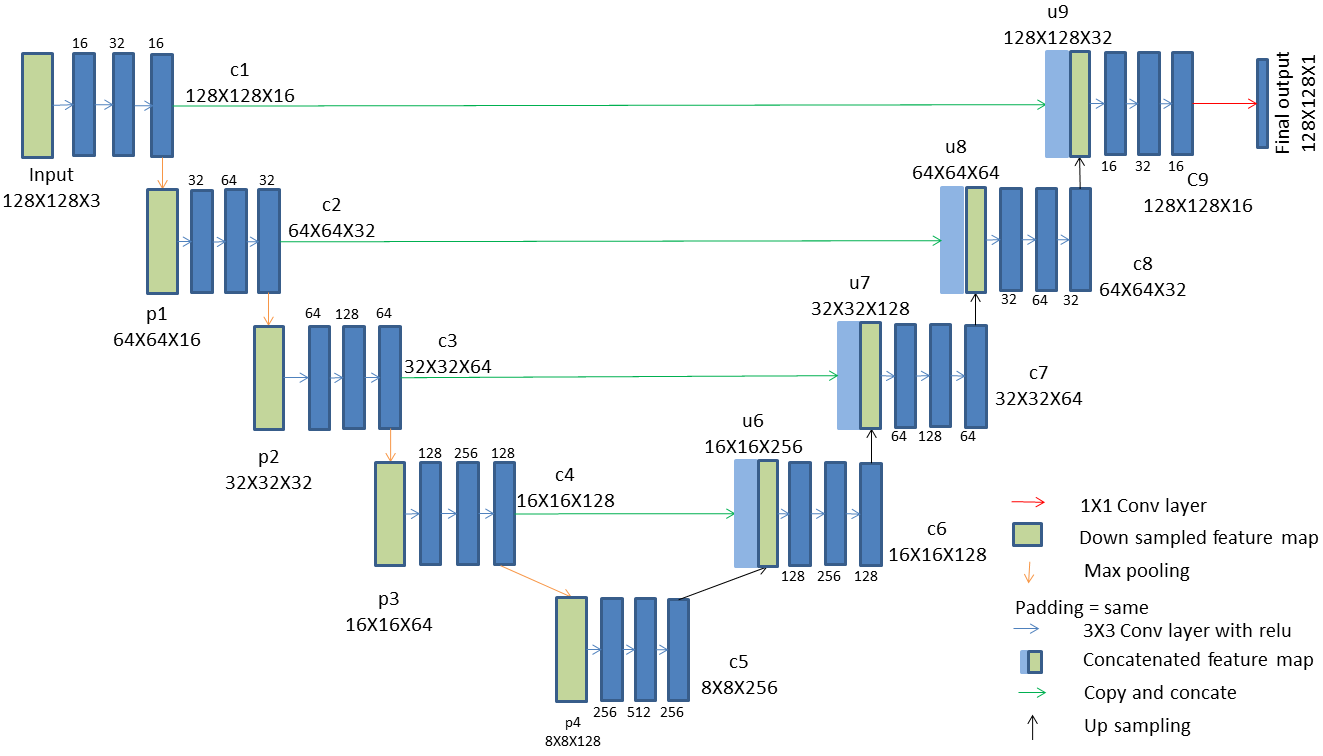

In [ ]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path

c1 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.ReLU()(c1)
c1 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.ReLU()(c1)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.ReLU()(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.ReLU()(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.ReLU()(c2)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.ReLU()(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.ReLU()(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.ReLU()(c3)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.ReLU()(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.ReLU()(c4)
c4 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.ReLU()(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.ReLU()(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)
c5 = tf.keras.layers.Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.ReLU()(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.ReLU()(c6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.ReLU()(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.BatchNormalization()(c7)
c7 = tf.keras.layers.ReLU()(c7)
c7 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
c7 = tf.keras.layers.BatchNormalization()(c7)
c7 = tf.keras.layers.ReLU()(c7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
c7 = tf.keras.layers.BatchNormalization()(c7)
c7 = tf.keras.layers.ReLU()(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.ReLU()(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.ReLU()(c8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.ReLU()(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.ReLU()(c9)
c9 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.ReLU()(c9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.ReLU()(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


**The Residual U-net Architecture**

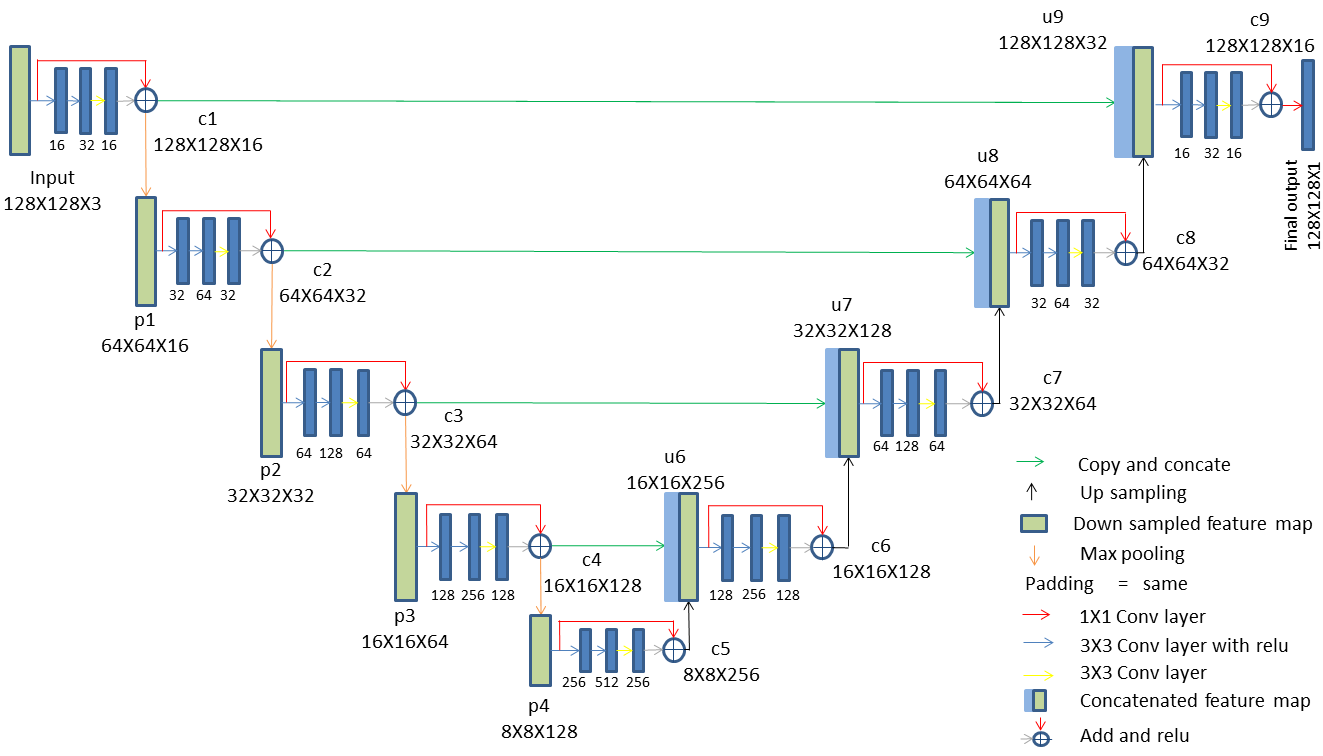

In [ ]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


#Contraction path
R1 = tf.keras.layers.Conv2D(16, (1, 1), kernel_initializer='he_normal', padding='same')(s)
R1 = tf.keras.layers.BatchNormalization()(R1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.ReLU()(c1)
c1 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.ReLU()(c1)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.add([c1,R1])
c1 = tf.keras.layers.ReLU()(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

R2 = tf.keras.layers.Conv2D(32,(1,1),kernel_initializer='he_normal', padding='same')(p1)
R2 = tf.keras.layers.BatchNormalization()(R2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.ReLU()(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.ReLU()(c2)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.add([c2,R2])
c2 = tf.keras.layers.ReLU()(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

R3 = tf.keras.layers.Conv2D(64,(1,1),kernel_initializer='he_normal', padding='same')(p2)
R3 = tf.keras.layers.BatchNormalization()(R3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.ReLU()(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.ReLU()(c3)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.add([c3,R3])
c3 = tf.keras.layers.ReLU()(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

R4 = tf.keras.layers.Conv2D(128,(1,1),kernel_initializer='he_normal', padding='same')(p3)
R4 = tf.keras.layers.BatchNormalization()(R4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.ReLU()(c4)
c4 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.ReLU()(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.add([c4,R4])
c4 = tf.keras.layers.ReLU()(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

R5 = tf.keras.layers.Conv2D(256,(1,1),kernel_initializer='he_normal', padding='same')(p4)
R5 = tf.keras.layers.BatchNormalization()(R5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)
c5 = tf.keras.layers.Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.add([c5,R5])
c5 = tf.keras.layers.ReLU()(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
R6 = tf.keras.layers.Conv2D(128,(1,1),kernel_initializer='he_normal', padding='same')(u6)
R6 = tf.keras.layers.BatchNormalization()(R6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.ReLU()(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.ReLU()(c6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.add([c6,R6])
c6 = tf.keras.layers.ReLU()(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
R7 = tf.keras.layers.Conv2D(64,(1,1),kernel_initializer='he_normal', padding='same')(u7)
R7 = tf.keras.layers.BatchNormalization()(R7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.BatchNormalization()(c7)
c7 = tf.keras.layers.ReLU()(c7)
c7 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
c7 = tf.keras.layers.BatchNormalization()(c7)
c7 = tf.keras.layers.ReLU()(c7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
c7 = tf.keras.layers.BatchNormalization()(c7)
c7 = tf.keras.layers.add([c7,R7])
c7 = tf.keras.layers.ReLU()(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
R8 = tf.keras.layers.Conv2D(32,(1,1),kernel_initializer='he_normal', padding='same')(u8)
R8 = tf.keras.layers.BatchNormalization()(R8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.ReLU()(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.ReLU()(c8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.add([c8,R8])
c8 = tf.keras.layers.ReLU()(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
R9 = tf.keras.layers.Conv2D(16,(1,1),kernel_initializer='he_normal', padding='same')(u9)
R9 = tf.keras.layers.BatchNormalization()(R9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.ReLU()(c9)
c9 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.ReLU()(c9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.add([c9,R9])
c9 = tf.keras.layers.ReLU()(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


**The Inception U-net Architecture**

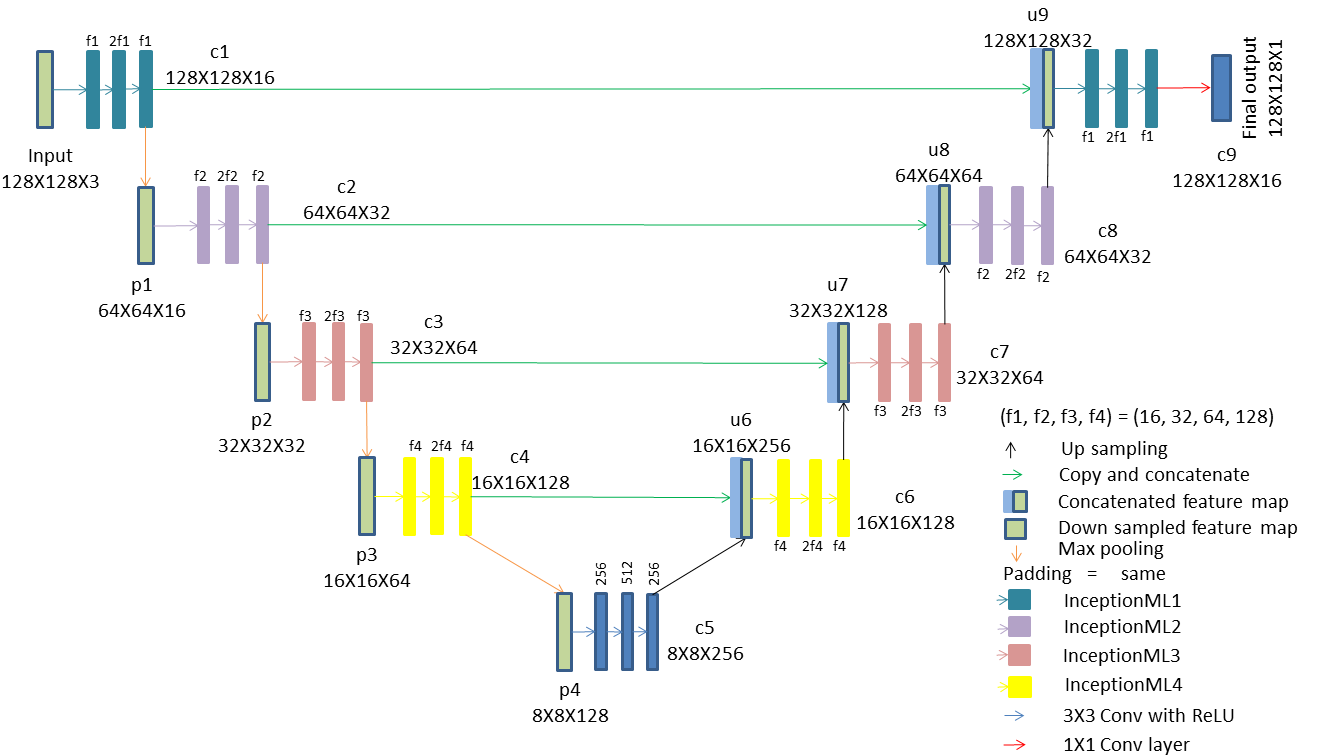

In [ ]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

##DOWNSAMPLING
##layer1

#A member
c1A = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(s)
c1A = tf.keras.layers.Conv2D(3, (1, 1), kernel_initializer='he_normal', padding='same')(c1A)
c1A = tf.keras.layers.BatchNormalization()(c1A)
c1A = tf.keras.layers.ReLU()(c1A)

#B member
c1B = tf.keras.layers.Conv2D(3, (1, 1), kernel_initializer='he_normal', padding='same')(s)
c1B = tf.keras.layers.BatchNormalization()(c1B)
c1B = tf.keras.layers.ReLU()(c1B)

#C member
c1C = tf.keras.layers.Conv2D(32, (1, 1), kernel_initializer='he_normal', padding='same')(s)
c1C = tf.keras.layers.BatchNormalization()(c1C)
c1C = tf.keras.layers.ReLU()(c1C)
c1C = tf.keras.layers.Conv2D(5, (3, 3), kernel_initializer='he_normal', padding='same')(c1C)
c1C = tf.keras.layers.BatchNormalization()(c1C)
c1C = tf.keras.layers.ReLU()(c1C)

#D member
c1D = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(s)
c1D = tf.keras.layers.BatchNormalization()(c1D)
c1D = tf.keras.layers.ReLU()(c1D)
c1D = tf.keras.layers.Conv2D(5, (5, 5), kernel_initializer='he_normal', padding='same')(c1D)
c1D = tf.keras.layers.BatchNormalization()(c1D)
c1D = tf.keras.layers.ReLU()(c1D)

C1 = tf.keras.layers.concatenate([c1A,c1B,c1C,c1D])

#A member
c1A = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(C1)
c1A = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(c1A)
c1A = tf.keras.layers.BatchNormalization()(c1A)
c1A = tf.keras.layers.ReLU()(c1A)

#B member
c1B = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(C1)
c1B = tf.keras.layers.BatchNormalization()(c1B)
c1B = tf.keras.layers.ReLU()(c1B)

#C member
c1C = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C1)
c1C = tf.keras.layers.BatchNormalization()(c1C)
c1C = tf.keras.layers.ReLU()(c1C)
c1C = tf.keras.layers.Conv2D(10, (3, 3), kernel_initializer='he_normal', padding='same')(c1C)
c1C = tf.keras.layers.BatchNormalization()(c1C)
c1C = tf.keras.layers.ReLU()(c1C)

#D member
c1D = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C1)
c1D = tf.keras.layers.BatchNormalization()(c1D)
c1D = tf.keras.layers.ReLU()(c1D)
c1D = tf.keras.layers.Conv2D(10, (5, 5), kernel_initializer='he_normal', padding='same')(c1D)
c1D = tf.keras.layers.BatchNormalization()(c1D)
c1D = tf.keras.layers.ReLU()(c1D)

C1 = tf.keras.layers.concatenate([c1A,c1B,c1C,c1D])

#A member
c1A = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(C1)
c1A = tf.keras.layers.Conv2D(3, (1, 1), kernel_initializer='he_normal', padding='same')(c1A)
c1A = tf.keras.layers.BatchNormalization()(c1A)
c1A = tf.keras.layers.ReLU()(c1A)

#B member
c1B = tf.keras.layers.Conv2D(3, (1, 1), kernel_initializer='he_normal', padding='same')(C1)
c1B = tf.keras.layers.BatchNormalization()(c1B)
c1B = tf.keras.layers.ReLU()(c1B)

#C member
c1C = tf.keras.layers.Conv2D(32, (1, 1), kernel_initializer='he_normal', padding='same')(C1)
c1C = tf.keras.layers.BatchNormalization()(c1C)
c1C = tf.keras.layers.ReLU()(c1C)
c1C = tf.keras.layers.Conv2D(5, (3, 3), kernel_initializer='he_normal', padding='same')(c1C)
c1C = tf.keras.layers.BatchNormalization()(c1C)
c1C = tf.keras.layers.ReLU()(c1C)

#D member
c1D = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C1)
c1D = tf.keras.layers.BatchNormalization()(c1D)
c1D = tf.keras.layers.ReLU()(c1D)
c1D = tf.keras.layers.Conv2D(5, (5, 5), kernel_initializer='he_normal', padding='same')(c1D)
c1D = tf.keras.layers.BatchNormalization()(c1D)
c1D = tf.keras.layers.ReLU()(c1D)

C1 = tf.keras.layers.concatenate([c1A,c1B,c1C,c1D])

p1 = tf.keras.layers.MaxPooling2D((2, 2))(C1)

##layer2

#A member
c2A = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(p1)
c2A = tf.keras.layers.BatchNormalization()(c2A)
c2A = tf.keras.layers.ReLU()(c2A)

c2A = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c2A)
c2A = tf.keras.layers.BatchNormalization()(c2A)
c2A = tf.keras.layers.ReLU()(c2A)

c2A = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c2A)
c2A = tf.keras.layers.BatchNormalization()(c2A)
c2A = tf.keras.layers.ReLU()(c2A)

#B member
c2B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(p1)
c2B = tf.keras.layers.BatchNormalization()(c2B)
c2B = tf.keras.layers.ReLU()(c2B)

c2B = tf.keras.layers.Conv2D(32, (5, 5), kernel_initializer='he_normal', padding='same')(c2B)
c2B = tf.keras.layers.BatchNormalization()(c2B)
c2B = tf.keras.layers.ReLU()(c2B)

c2B = tf.keras.layers.Conv2D(16, (5, 5), kernel_initializer='he_normal', padding='same')(c2B)
c2B = tf.keras.layers.BatchNormalization()(c2B)
c2B = tf.keras.layers.ReLU()(c2B)

C2 = tf.keras.layers.concatenate([c2A,c2B])

#A member
c2A = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C2)
c2A = tf.keras.layers.BatchNormalization()(c2A)
c2A = tf.keras.layers.ReLU()(c2A)

c2A = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c2A)
c2A = tf.keras.layers.BatchNormalization()(c2A)
c2A = tf.keras.layers.ReLU()(c2A)

c2A = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c2A)
c2A = tf.keras.layers.BatchNormalization()(c2A)
c2A = tf.keras.layers.ReLU()(c2A)

#B member
c2B = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C2)
c2B = tf.keras.layers.BatchNormalization()(c2B)
c2B = tf.keras.layers.ReLU()(c2B)

c2B = tf.keras.layers.Conv2D(64, (5, 5), kernel_initializer='he_normal', padding='same')(c2B)
c2B = tf.keras.layers.BatchNormalization()(c2B)
c2B = tf.keras.layers.ReLU()(c2B)

c2B = tf.keras.layers.Conv2D(32, (5, 5), kernel_initializer='he_normal', padding='same')(c2B)
c2B = tf.keras.layers.BatchNormalization()(c2B)
c2B = tf.keras.layers.ReLU()(c2B)

C2 = tf.keras.layers.concatenate([c2A,c2B])

#A member
c2A = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C2)
c2A = tf.keras.layers.BatchNormalization()(c2A)
c2A = tf.keras.layers.ReLU()(c2A)

c2A = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c2A)
c2A = tf.keras.layers.BatchNormalization()(c2A)
c2A = tf.keras.layers.ReLU()(c2A)

c2A = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c2A)
c2A = tf.keras.layers.BatchNormalization()(c2A)
c2A = tf.keras.layers.ReLU()(c2A)

#B member
c2B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C2)
c2B = tf.keras.layers.BatchNormalization()(c2B)
c2B = tf.keras.layers.ReLU()(c2B)

c2B = tf.keras.layers.Conv2D(32, (5, 5), kernel_initializer='he_normal', padding='same')(c2B)
c2B = tf.keras.layers.BatchNormalization()(c2B)
c2B = tf.keras.layers.ReLU()(c2B)

c2B = tf.keras.layers.Conv2D(16, (5, 5), kernel_initializer='he_normal', padding='same')(c2B)
c2B = tf.keras.layers.BatchNormalization()(c2B)
c2B = tf.keras.layers.ReLU()(c2B)

C2 = tf.keras.layers.concatenate([c2A,c2B])

p2 = tf.keras.layers.MaxPooling2D((2, 2))(C2)



## layer 3

#A member
c3A = tf.keras.layers.Conv2D(256, (1, 1), kernel_initializer='he_normal', padding='same')(p2)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A)

c3A = tf.keras.layers.Conv2D(128, (1, 7), kernel_initializer='he_normal', padding='same')(c3A)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A)

c3A = tf.keras.layers.Conv2D(64, (7,1), kernel_initializer='he_normal', padding='same')(c3A)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A)

c3A = tf.keras.layers.Conv2D(32, (1, 7), kernel_initializer='he_normal', padding='same')(c3A)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A) 

#B member
c3B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(p2)
c3B = tf.keras.layers.BatchNormalization()(c3B)
c3B = tf.keras.layers.ReLU()(c3B)

c3B = tf.keras.layers.Conv2D(32, (1,7), kernel_initializer='he_normal', padding='same')(c3B)
c3B = tf.keras.layers.BatchNormalization()(c3B)
c3B = tf.keras.layers.ReLU()(c3B)

c3B = tf.keras.layers.Conv2D(20, (1, 7), kernel_initializer='he_normal', padding='same')(c3B)
c3B = tf.keras.layers.BatchNormalization()(c3B)
c3B = tf.keras.layers.ReLU()(c3B) 

#C member
c3C = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(p2)
c3C = tf.keras.layers.BatchNormalization()(c3C)
c3C = tf.keras.layers.ReLU()(c3C)

#D
c3D = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(p2)
c3D = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(c3D)
c3D = tf.keras.layers.BatchNormalization()(c3D)
c3D = tf.keras.layers.ReLU()(c3D)

C3 = tf.keras.layers.concatenate([c3A,c3B,c3C,c3D])



#A member
c3A = tf.keras.layers.Conv2D(512, (1, 1), kernel_initializer='he_normal', padding='same')(C3)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A)

c3A = tf.keras.layers.Conv2D(256, (1, 7), kernel_initializer='he_normal', padding='same')(c3A)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A)

c3A = tf.keras.layers.Conv2D(128, (7,1), kernel_initializer='he_normal', padding='same')(c3A)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A)

c3A = tf.keras.layers.Conv2D(64, (1, 7), kernel_initializer='he_normal', padding='same')(c3A)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A) 

#B member
c3B = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C3)
c3B = tf.keras.layers.BatchNormalization()(c3B)
c3B = tf.keras.layers.ReLU()(c3B)

c3B = tf.keras.layers.Conv2D(64, (1,7), kernel_initializer='he_normal', padding='same')(c3B)
c3B = tf.keras.layers.BatchNormalization()(c3B)
c3B = tf.keras.layers.ReLU()(c3B)

c3B = tf.keras.layers.Conv2D(40, (1, 7), kernel_initializer='he_normal', padding='same')(c3B)
c3B = tf.keras.layers.BatchNormalization()(c3B)
c3B = tf.keras.layers.ReLU()(c3B) 

#C member
c3C = tf.keras.layers.Conv2D(12, (1, 1), kernel_initializer='he_normal', padding='same')(C3)
c3C = tf.keras.layers.BatchNormalization()(c3C)
c3C = tf.keras.layers.ReLU()(c3C)

#D member
c3D = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(C3)
c3D = tf.keras.layers.Conv2D(12, (1, 1), kernel_initializer='he_normal', padding='same')(c3D)
c3D = tf.keras.layers.BatchNormalization()(c3D)
c3D = tf.keras.layers.ReLU()(c3D)

C3 = tf.keras.layers.concatenate([c3A,c3B,c3C,c3D])




#A member
c3A = tf.keras.layers.Conv2D(256, (1, 1), kernel_initializer='he_normal', padding='same')(C3)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A)

c3A = tf.keras.layers.Conv2D(128, (1, 7), kernel_initializer='he_normal', padding='same')(c3A)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A)

c3A = tf.keras.layers.Conv2D(64, (7,1), kernel_initializer='he_normal', padding='same')(c3A)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A)

c3A = tf.keras.layers.Conv2D(32, (1, 7), kernel_initializer='he_normal', padding='same')(c3A)
c3A = tf.keras.layers.BatchNormalization()(c3A)
c3A = tf.keras.layers.ReLU()(c3A) 

#B member
c3B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C3)
c3B = tf.keras.layers.BatchNormalization()(c3B)
c3B = tf.keras.layers.ReLU()(c3B)

c3B = tf.keras.layers.Conv2D(32, (1,7), kernel_initializer='he_normal', padding='same')(c3B)
c3B = tf.keras.layers.BatchNormalization()(c3B)
c3B = tf.keras.layers.ReLU()(c3B)

c3B = tf.keras.layers.Conv2D(20, (1, 7), kernel_initializer='he_normal', padding='same')(c3B)
c3B = tf.keras.layers.BatchNormalization()(c3B)
c3B = tf.keras.layers.ReLU()(c3B) 

#C member
c3C = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(C3)
c3C = tf.keras.layers.BatchNormalization()(c3C)
c3C = tf.keras.layers.ReLU()(c3C)

#D member
c3D = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(C3)
c3D = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(c3D)
c3D = tf.keras.layers.BatchNormalization()(c3D)
c3D = tf.keras.layers.ReLU()(c3D)

C3 = tf.keras.layers.concatenate([c3A,c3B,c3C,c3D])
p3 = tf.keras.layers.MaxPooling2D((2, 2))(C3)


## layer 4

#A member
c4A = tf.keras.layers.Conv2D(28, (1, 1), kernel_initializer='he_normal', padding='same')(p3)
c4A = tf.keras.layers.BatchNormalization()(c4A)
c4A = tf.keras.layers.ReLU()(c4A)

#B member

c4B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(p3)
c4B = tf.keras.layers.BatchNormalization()(c4B)
c4B = tf.keras.layers.ReLU()(c4B)

c4B = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c4B)
c4B = tf.keras.layers.BatchNormalization()(c4B)
c4B = tf.keras.layers.ReLU()(c4B)

c4B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(c4B)
c4B = tf.keras.layers.BatchNormalization()(c4B)
c4B = tf.keras.layers.ReLU()(c4B)

#C member

c4C = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(p3)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

c4C = tf.keras.layers.Conv2D(256, (1, 3), kernel_initializer='he_normal', padding='same')(c4C)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

c4C = tf.keras.layers.Conv2D(128, (3, 1), kernel_initializer='he_normal', padding='same')(c4C)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

c4C = tf.keras.layers.Conv2D(36, (3, 3), kernel_initializer='he_normal', padding='same')(c4C)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

C4 = tf.keras.layers.concatenate([c4A,c4B,c4C])


#A member
c4A = tf.keras.layers.Conv2D(56, (1, 1), kernel_initializer='he_normal', padding='same')(C4)
c4A = tf.keras.layers.BatchNormalization()(c4A)
c4A = tf.keras.layers.ReLU()(c4A)

#B member

c4B = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C4)
c4B = tf.keras.layers.BatchNormalization()(c4B)
c4B = tf.keras.layers.ReLU()(c4B)

c4B = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c4B)
c4B = tf.keras.layers.BatchNormalization()(c4B)
c4B = tf.keras.layers.ReLU()(c4B)

c4B = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(c4B)
c4B = tf.keras.layers.BatchNormalization()(c4B)
c4B = tf.keras.layers.ReLU()(c4B)

#C member

c4C = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C4)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

c4C = tf.keras.layers.Conv2D(512, (1, 3), kernel_initializer='he_normal', padding='same')(c4C)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

c4C = tf.keras.layers.Conv2D(256, (3, 1), kernel_initializer='he_normal', padding='same')(c4C)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

c4C = tf.keras.layers.Conv2D(72, (3, 3), kernel_initializer='he_normal', padding='same')(c4C)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

C4 = tf.keras.layers.concatenate([c4A,c4B,c4C])



#A member
c4A = tf.keras.layers.Conv2D(28, (1, 1), kernel_initializer='he_normal', padding='same')(C4)
c4A = tf.keras.layers.BatchNormalization()(c4A)
c4A = tf.keras.layers.ReLU()(c4A)

#B member

c4B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C4)
c4B = tf.keras.layers.BatchNormalization()(c4B)
c4B = tf.keras.layers.ReLU()(c4B)

c4B = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c4B)
c4B = tf.keras.layers.BatchNormalization()(c4B)
c4B = tf.keras.layers.ReLU()(c4B)

c4B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(c4B)
c4B = tf.keras.layers.BatchNormalization()(c4B)
c4B = tf.keras.layers.ReLU()(c4B)

#C member

c4C = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C4)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

c4C = tf.keras.layers.Conv2D(256, (1, 3), kernel_initializer='he_normal', padding='same')(c4C)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

c4C = tf.keras.layers.Conv2D(128, (3, 1), kernel_initializer='he_normal', padding='same')(c4C)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

c4C = tf.keras.layers.Conv2D(36, (3, 3), kernel_initializer='he_normal', padding='same')(c4C)
c4C = tf.keras.layers.BatchNormalization()(c4C)
c4C = tf.keras.layers.ReLU()(c4C)

C4 = tf.keras.layers.concatenate([c4A,c4B,c4C])
p4 = tf.keras.layers.MaxPooling2D((2, 2))(C4)

##BRIDGE
##Layer5
c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)
c5 = tf.keras.layers.Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)
C5 = tf.keras.layers.ReLU()(c5)

##UPSAMPLING
##layer 6
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, C4])

#A member
c6A = tf.keras.layers.Conv2D(28, (1, 1), kernel_initializer='he_normal', padding='same')(u6)
c6A = tf.keras.layers.BatchNormalization()(c6A)
c6A = tf.keras.layers.ReLU()(c6A)

#B member

c6B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(u6)
c6B = tf.keras.layers.BatchNormalization()(c6B)
c6B = tf.keras.layers.ReLU()(c6B)

c6B = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c6B)
c6B = tf.keras.layers.BatchNormalization()(c6B)
c6B = tf.keras.layers.ReLU()(c6B)

c6B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(c6B)
c6B = tf.keras.layers.BatchNormalization()(c6B)
c6B = tf.keras.layers.ReLU()(c6B)

#C member

c6C = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(u6)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

c6C = tf.keras.layers.Conv2D(256, (1, 3), kernel_initializer='he_normal', padding='same')(c6C)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

c6C = tf.keras.layers.Conv2D(128, (3, 1), kernel_initializer='he_normal', padding='same')(c6C)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

c6C = tf.keras.layers.Conv2D(36, (3, 3), kernel_initializer='he_normal', padding='same')(c6C)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

C6 = tf.keras.layers.concatenate([c6A,c6B,c6C])


#A member
c6A = tf.keras.layers.Conv2D(56, (1, 1), kernel_initializer='he_normal', padding='same')(C6)
c6A = tf.keras.layers.BatchNormalization()(c6A)
c6A = tf.keras.layers.ReLU()(c6A)

#B member

c6B = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C6)
c6B = tf.keras.layers.BatchNormalization()(c6B)
c6B = tf.keras.layers.ReLU()(c6B)

c6B = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c6B)
c6B = tf.keras.layers.BatchNormalization()(c6B)
c6B = tf.keras.layers.ReLU()(c6B)

c6B = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(c6B)
c6B = tf.keras.layers.BatchNormalization()(c6B)
c6B = tf.keras.layers.ReLU()(c6B)

#C member

c6C = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C6)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

c6C = tf.keras.layers.Conv2D(512, (1, 3), kernel_initializer='he_normal', padding='same')(c6C)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

c6C = tf.keras.layers.Conv2D(256, (3, 1), kernel_initializer='he_normal', padding='same')(c6C)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

c6C = tf.keras.layers.Conv2D(72, (3, 3), kernel_initializer='he_normal', padding='same')(c6C)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

C6 = tf.keras.layers.concatenate([c6A,c6B,c6C])



#A member
c6A = tf.keras.layers.Conv2D(28, (1, 1), kernel_initializer='he_normal', padding='same')(C6)
c6A = tf.keras.layers.BatchNormalization()(c6A)
c6A = tf.keras.layers.ReLU()(c6A)

#B member

c6B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C6)
c6B = tf.keras.layers.BatchNormalization()(c6B)
c6B = tf.keras.layers.ReLU()(c6B)

c6B = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c6B)
c6B = tf.keras.layers.BatchNormalization()(c6B)
c6B = tf.keras.layers.ReLU()(c6B)

c6B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(c6B)
c6B = tf.keras.layers.BatchNormalization()(c6B)
c6B = tf.keras.layers.ReLU()(c6B)

#C member

c6C = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C6)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

c6C = tf.keras.layers.Conv2D(256, (1, 3), kernel_initializer='he_normal', padding='same')(c6C)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

c6C = tf.keras.layers.Conv2D(128, (3, 1), kernel_initializer='he_normal', padding='same')(c6C)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

c6C = tf.keras.layers.Conv2D(36, (3, 3), kernel_initializer='he_normal', padding='same')(c6C)
c6C = tf.keras.layers.BatchNormalization()(c6C)
c6C = tf.keras.layers.ReLU()(c6C)

C6 = tf.keras.layers.concatenate([c6A,c6B,c6C])

##layer 7
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(C6)
u7 = tf.keras.layers.concatenate([u7, C3])

#A member
c7A = tf.keras.layers.Conv2D(256, (1, 1), kernel_initializer='he_normal', padding='same')(u7)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A)

c7A = tf.keras.layers.Conv2D(128, (1, 7), kernel_initializer='he_normal', padding='same')(c7A)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A)

c7A = tf.keras.layers.Conv2D(64, (7,1), kernel_initializer='he_normal', padding='same')(c7A)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A)

c7A = tf.keras.layers.Conv2D(32, (1, 7), kernel_initializer='he_normal', padding='same')(c7A)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A) 

#B member
c7B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(u7)
c7B = tf.keras.layers.BatchNormalization()(c7B)
c7B = tf.keras.layers.ReLU()(c7B)

c7B = tf.keras.layers.Conv2D(32, (1,7), kernel_initializer='he_normal', padding='same')(c7B)
c7B = tf.keras.layers.BatchNormalization()(c7B)
c7B = tf.keras.layers.ReLU()(c7B)

c7B = tf.keras.layers.Conv2D(20, (1, 7), kernel_initializer='he_normal', padding='same')(c7B)
c7B = tf.keras.layers.BatchNormalization()(c7B)
c7B = tf.keras.layers.ReLU()(c7B) 

#C member
c7C = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(u7)
c7C = tf.keras.layers.BatchNormalization()(c7C)
c7C = tf.keras.layers.ReLU()(c7C)

#D
c7D = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(u7)
c7D = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(c7D)
c7D = tf.keras.layers.BatchNormalization()(c7D)
c7D = tf.keras.layers.ReLU()(c7D)

C7 = tf.keras.layers.concatenate([c3A,c3B,c3C,c3D])



#A member
c7A = tf.keras.layers.Conv2D(512, (1, 1), kernel_initializer='he_normal', padding='same')(C7)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A)

c7A = tf.keras.layers.Conv2D(256, (1, 7), kernel_initializer='he_normal', padding='same')(c7A)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A)

c7A = tf.keras.layers.Conv2D(128, (7,1), kernel_initializer='he_normal', padding='same')(c7A)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A)

c7A = tf.keras.layers.Conv2D(64, (1, 7), kernel_initializer='he_normal', padding='same')(c7A)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A) 

#B member
c7B = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C7)
c7B = tf.keras.layers.BatchNormalization()(c7B)
c7B = tf.keras.layers.ReLU()(c7B)

c7B = tf.keras.layers.Conv2D(64, (1,7), kernel_initializer='he_normal', padding='same')(c7B)
c7B = tf.keras.layers.BatchNormalization()(c7B)
c7B = tf.keras.layers.ReLU()(c7B)

c7B = tf.keras.layers.Conv2D(40, (1, 7), kernel_initializer='he_normal', padding='same')(c7B)
c7B = tf.keras.layers.BatchNormalization()(c7B)
c7B = tf.keras.layers.ReLU()(c7B) 

#C member
c7C = tf.keras.layers.Conv2D(12, (1, 1), kernel_initializer='he_normal', padding='same')(C7)
c7C = tf.keras.layers.BatchNormalization()(c7C)
c7C = tf.keras.layers.ReLU()(c7C)

#D
c7D = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(C7)
c7D = tf.keras.layers.Conv2D(12, (1, 1), kernel_initializer='he_normal', padding='same')(c7D)
c7D = tf.keras.layers.BatchNormalization()(c7D)
c7D = tf.keras.layers.ReLU()(c7D)

C7 = tf.keras.layers.concatenate([c7A,c7B,c7C,c7D])




#A member
c7A = tf.keras.layers.Conv2D(256, (1, 1), kernel_initializer='he_normal', padding='same')(C7)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A)

c7A = tf.keras.layers.Conv2D(128, (1, 7), kernel_initializer='he_normal', padding='same')(c7A)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A)

c7A = tf.keras.layers.Conv2D(64, (7,1), kernel_initializer='he_normal', padding='same')(c7A)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A)

c7A = tf.keras.layers.Conv2D(32, (1, 7), kernel_initializer='he_normal', padding='same')(c7A)
c7A = tf.keras.layers.BatchNormalization()(c7A)
c7A = tf.keras.layers.ReLU()(c7A) 

#B member
c7B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C7)
c7B = tf.keras.layers.BatchNormalization()(c7B)
c7B = tf.keras.layers.ReLU()(c7B)

c7B = tf.keras.layers.Conv2D(32, (1,7), kernel_initializer='he_normal', padding='same')(c7B)
c7B = tf.keras.layers.BatchNormalization()(c7B)
c7B = tf.keras.layers.ReLU()(c7B)

c7B = tf.keras.layers.Conv2D(20, (1, 7), kernel_initializer='he_normal', padding='same')(c7B)
c7B = tf.keras.layers.BatchNormalization()(c7B)
c7B = tf.keras.layers.ReLU()(c7B) 

#C member
c7C = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(C7)
c7C = tf.keras.layers.BatchNormalization()(c7C)
c7C = tf.keras.layers.ReLU()(c7C)

#D member
c7D = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(C7)
c7D = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(c7D)
c7D = tf.keras.layers.BatchNormalization()(c7D)
c7D = tf.keras.layers.ReLU()(c7D)

C7 = tf.keras.layers.concatenate([c7A,c7B,c7C,c7D])

##layer 8
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(C7)
u8 = tf.keras.layers.concatenate([u8, C2])


#A member
c8A = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(u8)
c8A = tf.keras.layers.BatchNormalization()(c8A)
c8A = tf.keras.layers.ReLU()(c8A)

c8A = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8A)
c8A = tf.keras.layers.BatchNormalization()(c8A)
c8A = tf.keras.layers.ReLU()(c8A)

c8A = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c8A)
c8A = tf.keras.layers.BatchNormalization()(c8A)
c8A = tf.keras.layers.ReLU()(c8A)

#B member
c8B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(u8)
c8B = tf.keras.layers.BatchNormalization()(c8B)
c8B = tf.keras.layers.ReLU()(c8B)

c8B = tf.keras.layers.Conv2D(32, (5, 5), kernel_initializer='he_normal', padding='same')(c8B)
c8B = tf.keras.layers.BatchNormalization()(c8B)
c8B = tf.keras.layers.ReLU()(c8B)

c8B = tf.keras.layers.Conv2D(16, (5, 5), kernel_initializer='he_normal', padding='same')(c8B)
c8B = tf.keras.layers.BatchNormalization()(c8B)
c8B = tf.keras.layers.ReLU()(c8B)

C8 = tf.keras.layers.concatenate([c8A,c8B])

#A member
c8A = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C8)
c8A = tf.keras.layers.BatchNormalization()(c8A)
c8A = tf.keras.layers.ReLU()(c8A)

c8A = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c8A)
c8A = tf.keras.layers.BatchNormalization()(c8A)
c8A = tf.keras.layers.ReLU()(c8A)

c8A = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8A)
c8A = tf.keras.layers.BatchNormalization()(c8A)
c8A = tf.keras.layers.ReLU()(c8A)

#B member
c8B = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C8)
c8B = tf.keras.layers.BatchNormalization()(c8B)
c8B = tf.keras.layers.ReLU()(c8B)

c8B = tf.keras.layers.Conv2D(64, (5, 5), kernel_initializer='he_normal', padding='same')(c8B)
c8B = tf.keras.layers.BatchNormalization()(c8B)
c8B = tf.keras.layers.ReLU()(c8B)

c8B = tf.keras.layers.Conv2D(32, (5, 5), kernel_initializer='he_normal', padding='same')(c8B)
c8B = tf.keras.layers.BatchNormalization()(c8B)
c8B = tf.keras.layers.ReLU()(c8B)

C8 = tf.keras.layers.concatenate([c8A,c8B])

#A member
c8A = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C8)
c8A = tf.keras.layers.BatchNormalization()(c8A)
c8A = tf.keras.layers.ReLU()(c8A)

c8A = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8A)
c8A = tf.keras.layers.BatchNormalization()(c8A)
c8A = tf.keras.layers.ReLU()(c8A)

c8A = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c8A)
c8A = tf.keras.layers.BatchNormalization()(c8A)
c8A = tf.keras.layers.ReLU()(c8A)

#B member
c8B = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C8)
c8B = tf.keras.layers.BatchNormalization()(c8B)
c8B = tf.keras.layers.ReLU()(c8B)

c8B = tf.keras.layers.Conv2D(32, (5, 5), kernel_initializer='he_normal', padding='same')(c8B)
c8B = tf.keras.layers.BatchNormalization()(c8B)
c8B = tf.keras.layers.ReLU()(c8B)

c8B = tf.keras.layers.Conv2D(16, (5, 5), kernel_initializer='he_normal', padding='same')(c8B)
c8B = tf.keras.layers.BatchNormalization()(c8B)
c8B = tf.keras.layers.ReLU()(c8B)

C8 = tf.keras.layers.concatenate([c8A,c8B])

##layer 9
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(C8)
u9 = tf.keras.layers.concatenate([u9, C1], axis=3)
#A member
c9A = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(u9)
c9A = tf.keras.layers.Conv2D(3, (1, 1), kernel_initializer='he_normal', padding='same')(c9A)
c9A = tf.keras.layers.BatchNormalization()(c9A)
c9A = tf.keras.layers.ReLU()(c9A)

#B member
c9B = tf.keras.layers.Conv2D(3, (1, 1), kernel_initializer='he_normal', padding='same')(u9)
c9B = tf.keras.layers.BatchNormalization()(c9B)
c9B = tf.keras.layers.ReLU()(c9B)

#C member
c9C = tf.keras.layers.Conv2D(32, (1, 1), kernel_initializer='he_normal', padding='same')(u9)
c9C = tf.keras.layers.BatchNormalization()(c9C)
c9C = tf.keras.layers.ReLU()(c9C)
c9C = tf.keras.layers.Conv2D(5, (3, 3), kernel_initializer='he_normal', padding='same')(c9C)
c9C = tf.keras.layers.BatchNormalization()(c9C)
c9C = tf.keras.layers.ReLU()(c9C)

#D member
c9D = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(u9)
c9D = tf.keras.layers.BatchNormalization()(c9D)
c9D = tf.keras.layers.ReLU()(c9D)
c9D = tf.keras.layers.Conv2D(5, (5, 5), kernel_initializer='he_normal', padding='same')(c9D)
c9D = tf.keras.layers.BatchNormalization()(c9D)
c9D = tf.keras.layers.ReLU()(c9D)

C9 = tf.keras.layers.concatenate([c9A,c9B,c9C,c9D])

#A member
c9A = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(C9)
c9A = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(c9A)
c9A = tf.keras.layers.BatchNormalization()(c9A)
c9A = tf.keras.layers.ReLU()(c9A)

#B member
c9B = tf.keras.layers.Conv2D(6, (1, 1), kernel_initializer='he_normal', padding='same')(C9)
c9B = tf.keras.layers.BatchNormalization()(c9B)
c9B = tf.keras.layers.ReLU()(c9B)

#C member
c9C = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C9)
c9C = tf.keras.layers.BatchNormalization()(c9C)
c9C = tf.keras.layers.ReLU()(c9C)
c9C = tf.keras.layers.Conv2D(10, (3, 3), kernel_initializer='he_normal', padding='same')(c9C)
c9C = tf.keras.layers.BatchNormalization()(c9C)
c9C = tf.keras.layers.ReLU()(c9C)

#D member
c9D = tf.keras.layers.Conv2D(128, (1, 1), kernel_initializer='he_normal', padding='same')(C9)
c9D = tf.keras.layers.BatchNormalization()(c9D)
c9D = tf.keras.layers.ReLU()(c9D)
c9D = tf.keras.layers.Conv2D(10, (5, 5), kernel_initializer='he_normal', padding='same')(c9D)
c9D = tf.keras.layers.BatchNormalization()(c9D)
c9D = tf.keras.layers.ReLU()(c9D)

C9 = tf.keras.layers.concatenate([c9A,c9B,c9C,c9D])

#A member
c9A = tf.keras.layers.MaxPooling2D((2, 2),(1,1),padding='same')(C9)
c9A = tf.keras.layers.Conv2D(3, (1, 1), kernel_initializer='he_normal', padding='same')(c9A)
c9A = tf.keras.layers.BatchNormalization()(c9A)
c9A = tf.keras.layers.ReLU()(c9A)

#B member
c9B = tf.keras.layers.Conv2D(3, (1, 1), kernel_initializer='he_normal', padding='same')(C9)
c9B = tf.keras.layers.BatchNormalization()(c9B)
c9B = tf.keras.layers.ReLU()(c9B)

#C member
c9C = tf.keras.layers.Conv2D(32, (1, 1), kernel_initializer='he_normal', padding='same')(C9)
c9C = tf.keras.layers.BatchNormalization()(c9C)
c9C = tf.keras.layers.ReLU()(c9C)
c9C = tf.keras.layers.Conv2D(5, (3, 3), kernel_initializer='he_normal', padding='same')(c9C)
c9C = tf.keras.layers.BatchNormalization()(c9C)
c9C = tf.keras.layers.ReLU()(c9C)

#D member
c9D = tf.keras.layers.Conv2D(64, (1, 1), kernel_initializer='he_normal', padding='same')(C9)
c9D = tf.keras.layers.BatchNormalization()(c9D)
c9D = tf.keras.layers.ReLU()(c9D)
c9D = tf.keras.layers.Conv2D(5, (5, 5), kernel_initializer='he_normal', padding='same')(c9D)
c9D = tf.keras.layers.BatchNormalization()(c9D)
c9D = tf.keras.layers.ReLU()(c9D)

C9 = tf.keras.layers.concatenate([c9A,c9B,c9C,c9D])





outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(C9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()